Problem Statement:
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<b>
1. Which variables are significant in predicting the demand for shared bikes.

2. How well those variables describe the bike demands </b>

Some data information

- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not 
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

Steps:

1. Reading and Understanding the Data

2. Preparing data set for modeling, rescaleing(Traing vs Test data set)

3. Training the model

4. Residual Analysis

5. Predition and evalution on Test data set

## Step 1: Reading and Understanding the Data

In [1]:
# import Libariry
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import warnings #This is to avoid unnecessary warning
warnings.filterwarnings("ignore")

In [2]:
#Read data set
bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Info about bike  data set
bike.shape
bike.info()

bike.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Data Indicate that

1. Total 730 entries

2. No missing values

3. Total columns : 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt

4. Target variable is <b> cnt </b> and Predictor are 'instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered'
       


In [5]:
# Drop instant variable  because it is just an entry of data
bike=bike.drop("instant", axis=1)
# Drop dteday variable   because every data one separate  entry
bike=bike.drop("dteday", axis=1)
#Drop casual variable  because it reflects  on cnt  variable
bike=bike.drop("casual", axis=1)
#Drop registered variable  because it reflects  on cnt  variable
bike=bike.drop("registered", axis=1)
#Drop holiday  variable  because it reflects  on weekday and workingday  variables
bike=bike.drop("holiday", axis=1)

0.9916961786905648


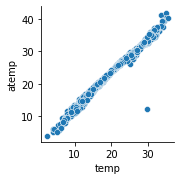

In [6]:
# Looks like temp and atemp has high correlation. lets draw the corrrelation and drop one of them
correlation = bike.temp.corr(bike.atemp)
print (correlation)
#Draw Pai plot between temp and atemp Variable
sns.pairplot(bike,x_vars=["temp"], y_vars=["atemp"])

In [7]:
# correlation value(0.99) between temp and atemp variable and pairplot also show both variable is highly correlated
#Drop atemp
bike=bike.drop("atemp", axis=1)

0.1285646754903822


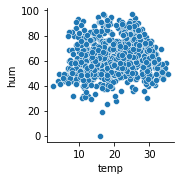

In [8]:
# Lets identify  the correlation between temp and hum
correlation = bike.temp.corr(bike.hum)
print (correlation)
#Draw Pai plot between temp and hum Variable
sns.pairplot(bike,x_vars=["temp"], y_vars=["hum"])

plt.show()

0.1285646754903822


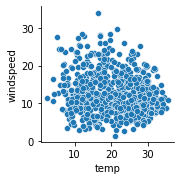

In [9]:
# Lets identify  the correlation between temp and windspeed
correlation = bike.temp.corr(bike.hum)
print (correlation)
#Draw Pai plot between temp and windspeed Variable
sns.pairplot(bike,x_vars=["temp"], y_vars=["windspeed"])
plt.show()

-0.24850586960205137


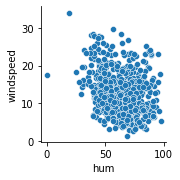

In [10]:
# Lets identify  the correlation between hum and windspeed
correlation = bike.hum.corr(bike.windspeed)
print (correlation)
#Draw Pai plot between temp and windspeed Variable
sns.pairplot(bike,x_vars=["hum"], y_vars=["windspeed"])
plt.show()

correlation between  temp and hum is low (0.12). So we cant drop hum variable 

correlation between  temp and windspeed  is low (0.12). So we cant drop windspeed variable

correlation between  hum and windspeed  is low (-0.24). So we cant drop windspeed variable 

Total columns :  'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp',  'hum', 'windspeed',
        'cnt

0.035799732268298606


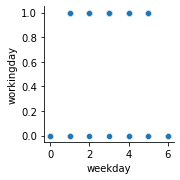

In [11]:
# Lets identify  the correlation between weekday and workingday
correlation = bike.weekday.corr(bike.workingday)
print (correlation)
#Draw Pai plot between temp and windspeed Variable
#plt.figure(figsize=(10, 10))
sns.pairplot(bike,x_vars=["weekday"], y_vars=["workingday"])
plt.show()

correlation between weekday and workingday is low (0.035). So we cant drop weekday variable

# Univariate and Bivariate Data Visualizations


In [12]:
bike.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,3,1,1,9.305237,43.6957,12.522300,1600


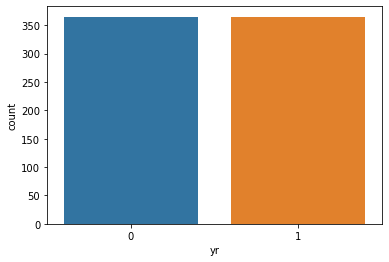

In [13]:
# Univariate Data Visualization for yr
sns.countplot(bike["yr"])
plt.show()

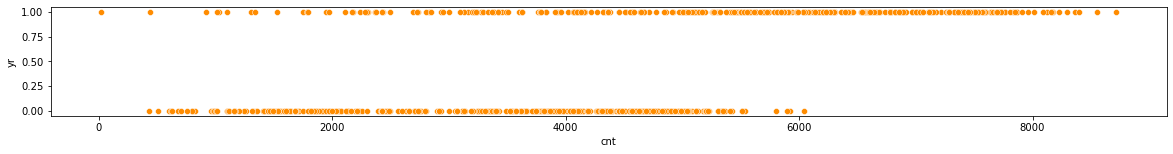

In [14]:
# Bivariate  Data Visualization for yr and cnt
plt.figure(figsize=(20,2))
sns.scatterplot(bike["cnt"],bike["yr"],color='darkorange') 
plt.show()

Bivariate  Data Visualization between yr and cnt data shows that there is significant difference between bike demand in 2018 and 2019

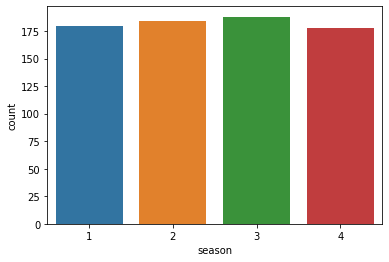

In [15]:
# Univariate Data Visualization for season
sns.countplot(bike["season"])
plt.show()

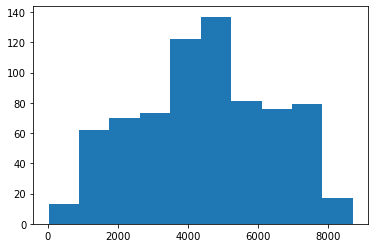

In [16]:
# Univariate Data Visualization for cnt
plt.hist(bike["cnt"])
plt.show()

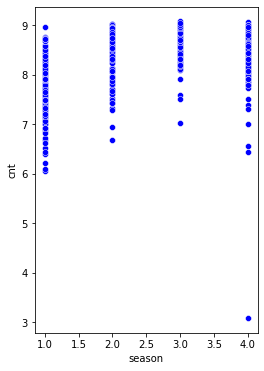

In [17]:
# Bivariate  Data Visualization for season and cnt
plt.figure(figsize=(4,6))
sns.scatterplot(bike["season"],np.log(bike["cnt"]),color='blue') 
plt.show()

<AxesSubplot:xlabel='season', ylabel='cnt'>

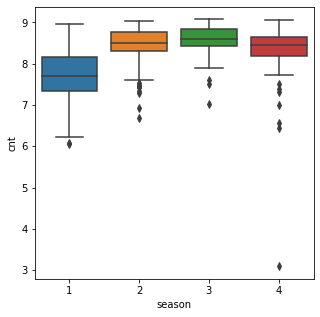

In [18]:
# Bivariate  Data Visualization for season and cnt
plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
sns.boxplot(x=bike["season"],y=np.log(bike["cnt"]),data=bike)

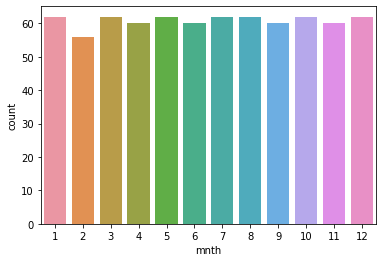

In [19]:
# Univariate Data Visualization for mnth
sns.countplot(bike["mnth"])
plt.show()

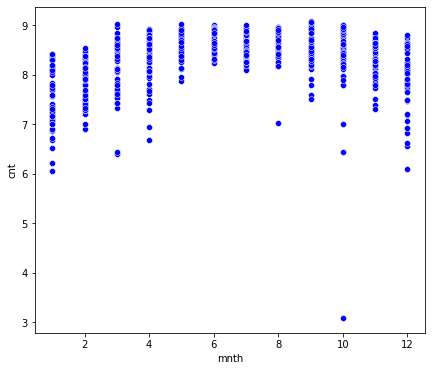

In [20]:
# Bivariate  Data Visualization for  mnth and vs cnt
plt.figure(figsize=(7,6))
sns.scatterplot(bike["mnth"],np.log(bike["cnt"]),color='blue') 
plt.show()

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

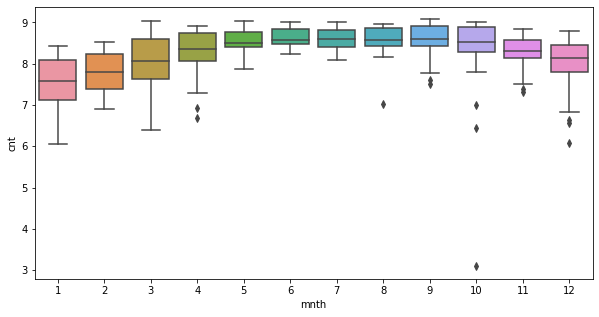

In [21]:
# Bivariate  Data Visualization for  mnth and vs cnt
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.boxplot(x=bike["mnth"],y=np.log(bike["cnt"]),data=bike)

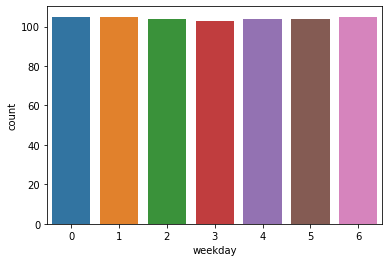

In [22]:
# Univariate Data Visualization for weekday 
sns.countplot(bike["weekday"])
plt.show()

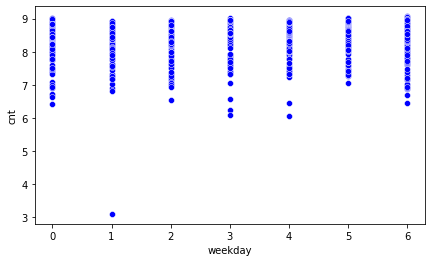

In [23]:
# Bivariate  Data Visualization for  weekday and vs cnt
plt.figure(figsize=(7,4))
sns.scatterplot(bike["weekday"],np.log(bike["cnt"]),color='blue') 
plt.show()

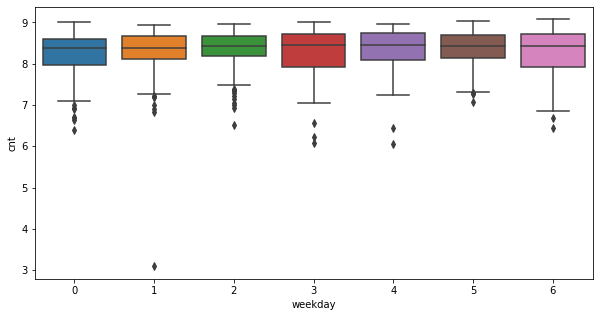

In [24]:
# Bivariate  Data Visualization for  weekday and vs cnt
plt.figure(figsize=(10,5))
plt.subplot(1,1,1)
sns.boxplot(x=bike["weekday"],y=np.log(bike["cnt"]),data=bike)
plt.show()

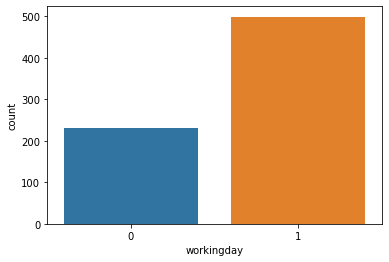

In [25]:
# Univariate Data Visualization for workingday
sns.countplot(bike["workingday"])
plt.show()

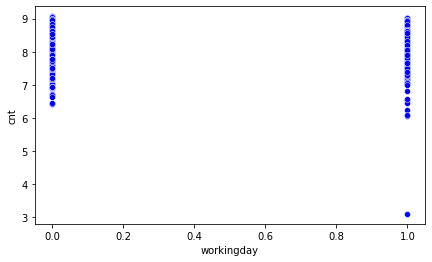

In [26]:
# Bivariate  Data Visualization for  workingday and vs cnt
plt.figure(figsize=(7,4))
sns.scatterplot(bike["workingday"],np.log(bike["cnt"]),color='blue') 
plt.show()

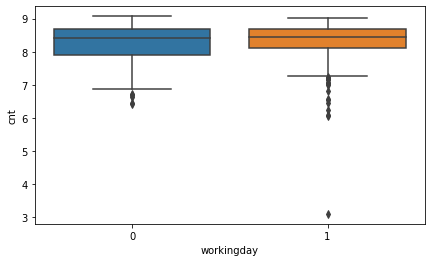

In [27]:
# Bivariate  Data Visualization for  workingday and vs cnt
plt.figure(figsize=(7,4))
plt.subplot(1,1,1)
sns.boxplot(x=bike["workingday"],y=np.log(bike["cnt"]),data=bike)
plt.show()

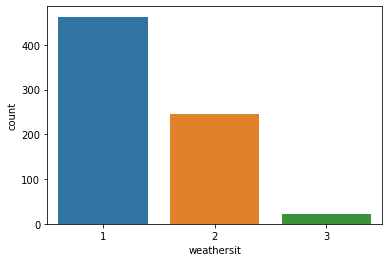

In [28]:
# Univariate Data Visualization for weathersit
sns.countplot(bike["weathersit"])
plt.show()

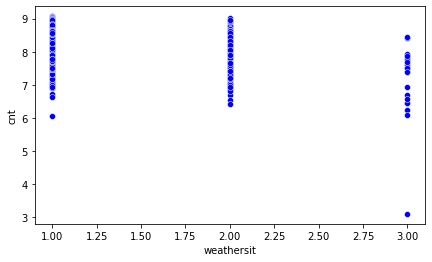

In [29]:
# Bivariate  Data Visualization for  weathersit and vs cnt
plt.figure(figsize=(7,4))
sns.scatterplot(bike["weathersit"],np.log(bike["cnt"]),color='blue') 
plt.show()

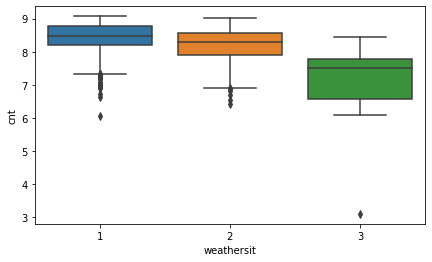

In [30]:
# Bivariate  Data Visualization for  weathersit and vs cnt
plt.figure(figsize=(7,4))
plt.subplot(1,1,1)
sns.boxplot(x=bike["weathersit"],y=np.log(bike["cnt"]),data=bike)
plt.show()

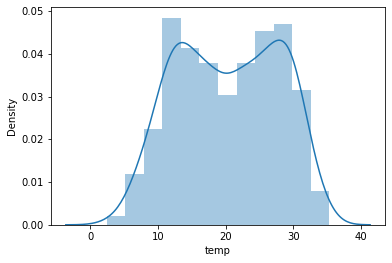

In [31]:
# Univariate Data Visualization for temp
sns.distplot(bike["temp"])
plt.show()

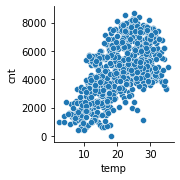

In [32]:
# Bivariate  Data Visualization for  temp and vs cnt
sns.pairplot(bike,x_vars=["temp"], y_vars=["cnt"])
plt.show()

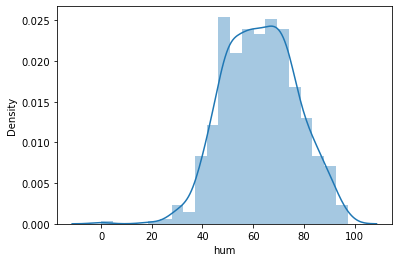

In [33]:
# Univariate Data Visualization for hum
sns.distplot(bike["hum"])
plt.show()

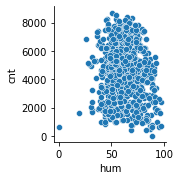

In [34]:
# Bivariate  Data Visualization for  hum and vs cnt
sns.pairplot(bike,x_vars=["hum"], y_vars=["cnt"])
plt.show()

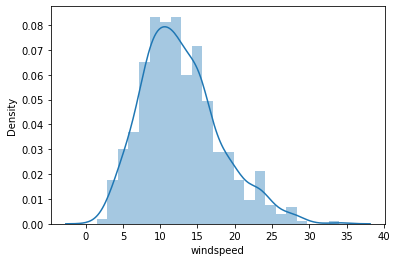

In [35]:
# Univariate Data Visualization for windspeed
sns.distplot(bike["windspeed"])
plt.show()

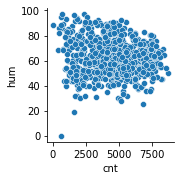

In [36]:
# Bivariate  Data Visualization for  hum and vs cnt
sns.pairplot(bike,x_vars=["cnt"], y_vars=["hum"])
plt.show()

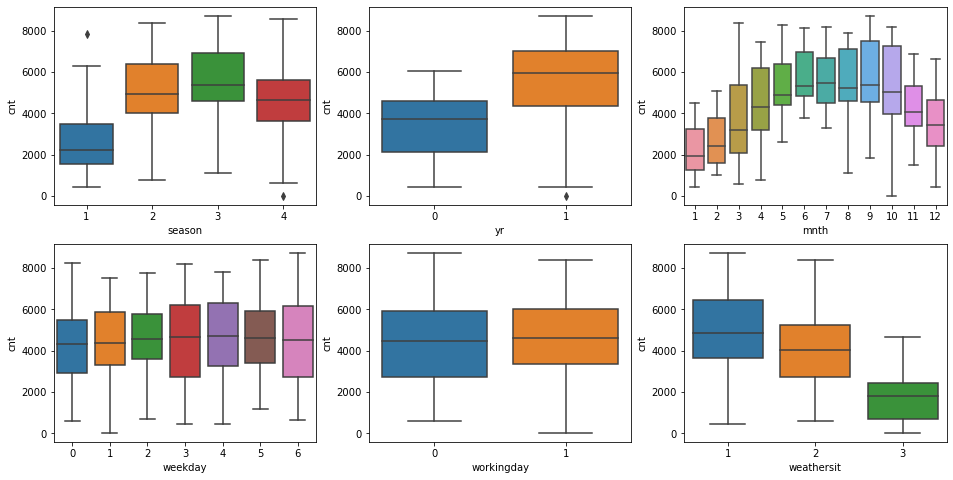

In [37]:
# Perform Bivariate  Data Visualization for all Categorical variable and cnt

plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(x="season",y="cnt",data=bike)
plt.subplot(2,3,2)
sns.boxplot(x="yr",y="cnt",data=bike)
plt.subplot(2,3,3)
sns.boxplot(x="mnth",y="cnt",data=bike)
plt.subplot(2,3,4)
sns.boxplot(x="weekday",y="cnt",data=bike)
plt.subplot(2,3,5)
sns.boxplot(x="workingday",y="cnt",data=bike)
plt.subplot(2,3,6)
sns.boxplot(x="weathersit",y="cnt",data=bike)
plt.show()

1. Fall season rental is highest among other season

2. Year 2019 has higher bike rental than Year 2018

3. September Month Rental is higher that other months

4. Saturday has highest rental

5. Working day rental is very little high compare to weekend and holiday 

6. Bike demand is highest in when weather is Clear

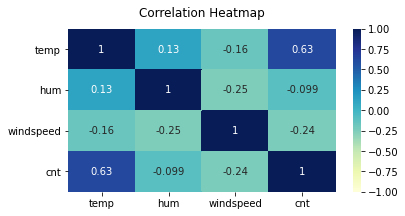

In [38]:
#Draw correlation metrics for numerical Variable.\
df_numeric_data=["temp","hum","windspeed","cnt"]
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(bike[df_numeric_data].corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

correlation between cnt  and temo is high (0.63). 

correlation between cnt and windspeed  is low and negative (-0.24). 

correlation between cnt and hum is low and negative (-0.099). 



In [39]:
# Now let change weekday variable  as it is categorical variable and it,s values doest not indicate any order
def data_weekday(x):
    if x==1:
        return "Monday"
    if x==2:
        return "Tuesday"
    if x==3:
        return "Wednesday"
    if x==4:
        return "Thursday"
    if x==5:
        return "Friday"
    if x==6:
        return "Saturday"
    if x==0:
        return "Sunday" 




In [40]:
bike["weekday"]=bike["weekday"].apply(data_weekday)

In [41]:
#dummy variable for season
status=pd.get_dummies(bike["weekday"])
status.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [42]:
# Drop one Dummy level
status=pd.get_dummies(bike["weekday"], drop_first=True)


In [43]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)

In [44]:
# Dreop season as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("weekday", axis=1)

In [45]:
bike.head()

,season,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,1,0,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,0
1,1,0,1,0,2,14.902598,69.6087,16.652113,801,0,0,1,0,0,0
2,1,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0
3,1,0,1,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0
4,1,0,1,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1


In [46]:
def data_season(x):
    if x==1: return "spring"
    if x==2: return "summer"
    if x==3: return "fall"
    if x==4: return "winter"

bike["season"]=bike["season"].apply(data_season)


In [47]:
#dummy variable for season
status=pd.get_dummies(bike["season"])
status.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [48]:
# Drop one Dummy level
status=pd.get_dummies(bike["season"], drop_first=True)


In [49]:
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [50]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)


In [51]:
# Dreop season as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("season", axis=1)


In [52]:
bike.head()

,yr,mnth,workingday,weathersit,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter
0,0,1,0,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0
1,0,1,0,2,14.902598,69.6087,16.652113,801,0,0,1,0,0,0,1,0,0
2,0,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0
3,0,1,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,1,0,0
4,0,1,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,1,0,0


In [53]:
def data_year(x):
    if x==1: return "2019"
    if x==0: return "2018"

bike["yr"]=bike["yr"].apply(data_year)


In [54]:
#dummy variable for yr
status=pd.get_dummies(bike["yr"])
status.head()

,2018,2019
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [55]:
# Drop one Dummy level
status=pd.get_dummies(bike["yr"], drop_first=True)


In [56]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)

In [57]:
# Dreop yr as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("yr", axis=1)

In [58]:
bike.head()

,mnth,workingday,weathersit,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,spring,summer,winter,2019
0,1,0,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,1,0,0,0
1,1,0,2,14.902598,69.6087,16.652113,801,0,0,1,0,0,0,1,0,0,0
2,1,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0
3,1,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,1,0,0,0
4,1,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,1,0,0,0


In [59]:
def data_mnth(x):
    if x==1: return "Jan"
    if x==2: return "Feb"
    if x==3: return "March"
    if x==4: return "April"
    if x==5: return "May"
    if x==6: return "June"
    if x==7: return "July"
    if x==8: return "Aug"
    if x==9: return "Sep"
    if x==10: return "Oct"
    if x==11: return "Nov"
    if x==12: return "Dec"

bike["mnth"]=bike["mnth"].apply(data_mnth)

In [60]:
#dummy variable for mnth
status=pd.get_dummies(bike["mnth"])
status.head()

,April,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [61]:
# Drop one Dummy level
status=pd.get_dummies(bike["mnth"], drop_first=True)

In [62]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)

In [63]:
# Dreop yr as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("mnth", axis=1)

In [64]:
bike.head()

,workingday,weathersit,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,...,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep
0,0,2,14.110847,80.5833,10.749882,985,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,2,14.902598,69.6087,16.652113,801,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,1,1,8.050924,43.7273,16.636703,1349,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
def data_workingday(x):
    if x==1: return "Workday"
    if x==0: return "Holiday"

bike["workingday"]=bike["workingday"].apply(data_workingday)

In [66]:
#dummy variable for workingday
status=pd.get_dummies(bike["workingday"])
status.head()

,Holiday,Workday
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [67]:
# Drop one Dummy level
status=pd.get_dummies(bike["workingday"], drop_first=True)

In [68]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)

In [69]:
# Dreop yr as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("workingday", axis=1)

In [70]:
bike.head()

,weathersit,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,...,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Workday
0,2,14.110847,80.5833,10.749882,985,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,14.902598,69.6087,16.652113,801,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1,8.200000,59.0435,10.739832,1562,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,1,9.305237,43.6957,12.522300,1600,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [71]:
def data_weathersit(x):
    if x==1: return "Clear"
    if x==2: return "Mist"
    if x==3: return "Light_Snow"
    if x==4: return "Heavy_Rain"

bike["weathersit"]=bike["weathersit"].apply(data_weathersit)

In [72]:
#dummy variable for workingday
status=pd.get_dummies(bike["weathersit"])
status.head()

,Clear,Light_Snow,Mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [73]:
# Drop one Dummy level
status=pd.get_dummies(bike["weathersit"], drop_first=True)


In [74]:
#Join sataus variable in data frame, bike is data frame here. concating two data frame
bike = pd.concat([bike,status],axis=1)

In [75]:
# Dreop yr as you dont need it also you can not feed into model because it is categorical
bike = bike.drop("weathersit", axis=1)

In [76]:
bike.head()

,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,July,June,March,May,Nov,Oct,Sep,Workday,Light_Snow,Mist
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [77]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        730 non-null    float64
 1   hum         730 non-null    float64
 2   windspeed   730 non-null    float64
 3   cnt         730 non-null    int64  
 4   Monday      730 non-null    uint8  
 5   Saturday    730 non-null    uint8  
 6   Sunday      730 non-null    uint8  
 7   Thursday    730 non-null    uint8  
 8   Tuesday     730 non-null    uint8  
 9   Wednesday   730 non-null    uint8  
 10  spring      730 non-null    uint8  
 11  summer      730 non-null    uint8  
 12  winter      730 non-null    uint8  
 13  2019        730 non-null    uint8  
 14  Aug         730 non-null    uint8  
 15  Dec         730 non-null    uint8  
 16  Feb         730 non-null    uint8  
 17  Jan         730 non-null    uint8  
 18  July        730 non-null    uint8  
 19  June        730 non-null    u

Total 30 independent variable here. 


### Using RFE

In [78]:
bike_rfe=bike

In [79]:
bike_rfe.head()

,temp,hum,windspeed,cnt,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,July,June,March,May,Nov,Oct,Sep,Workday,Light_Snow,Mist
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [80]:
df_train , df_test=train_test_split(bike_rfe, train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 28)
(220, 28)


In [81]:
#Min -max scale
scaler=MinMaxScaler()
df_numeric=["temp","hum","windspeed","cnt"]

df_train[df_numeric]=scaler.fit_transform(df_train[df_numeric])

In [82]:
df_train.columns

Index(['temp', 'hum', 'windspeed', 'cnt', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday', 'spring', 'summer', 'winter',
       '2019', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'March', 'May',
       'Nov', 'Oct', 'Sep', 'Workday', 'Light_Snow', 'Mist'],
      dtype='object')

In [83]:
df_train.shape

(510, 28)

In [84]:
y_train = df_train.pop('cnt')
X_train = df_train

In [85]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [86]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [87]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Monday', False, 12),
 ('Saturday', True, 1),
 ('Sunday', False, 3),
 ('Thursday', False, 14),
 ('Tuesday', False, 13),
 ('Wednesday', False, 15),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', False, 4),
 ('2019', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 8),
 ('Feb', False, 9),
 ('Jan', False, 6),
 ('July', True, 1),
 ('June', False, 17),
 ('March', False, 18),
 ('May', False, 10),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Workday', False, 2),
 ('Light_Snow', True, 1),
 ('Mist', True, 1)]

In [88]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'Saturday', 'spring', '2019', 'July', 'Sep',
       'Light_Snow', 'Mist'],
      dtype='object')

In [89]:
X_train.columns[~rfe.support_]

Index(['Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'June', 'March', 'May', 'Nov',
       'Oct', 'Workday'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [90]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [91]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_saturday=X_train_rfe

In [92]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [93]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          4.32e-184
Time:                        21:09:45   Log-Likelihood:                 489.01
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     499   BIC:                            -909.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3764      0.030     12.424      0.0

Saturday is insignificant in presence of other variables; can be dropped

In [94]:
X_train_lm = X_train_rfe.drop(['Saturday'], axis=1)



Rebuilding the model without Saturday

In [95]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

In [96]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [97]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.8
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.39e-184
Time:                        21:09:45   Log-Likelihood:                 487.28
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     500   BIC:                            -912.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3820      0.030     12.644      0.0

In [98]:
X_train_lm = X_train_lm.drop(['const'], axis=1)


In [99]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,14.87
0,temp,11.88
2,windspeed,3.95
8,Mist,2.11
4,2019,2.03
3,spring,1.84
5,July,1.40
6,Sep,1.20
7,Light_Snow,1.20


In [100]:
X_train_lm = X_train_lm.drop(['hum'], axis=1)


In [101]:
X_train_lm = sm.add_constant(X_train_lm)

In [102]:
lm = sm.OLS(y_train,X_train_lm).fit()

In [103]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     292.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.31e-183
Time:                        21:09:45   Log-Likelihood:                 481.47
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     501   BIC:                            -906.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3021      0.019     15.795      0.0

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,20.68
1,temp,2.02
3,spring,1.64
5,July,1.28
6,Sep,1.10
2,windspeed,1.06
7,Light_Snow,1.04
8,Mist,1.04
4,2019,1.02


In [105]:
Feat_selected=X.columns

In [106]:
Feat_selected=Feat_selected.drop("const")

These VIF looks good

### Residual Analysis of the train data

In [107]:
X_train_lm = sm.add_constant(X_train_lm)
y_train_cnt = lm.predict(X_train_lm)

In [108]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

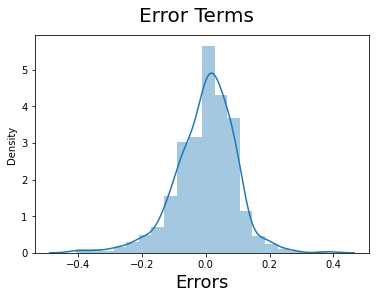

In [109]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

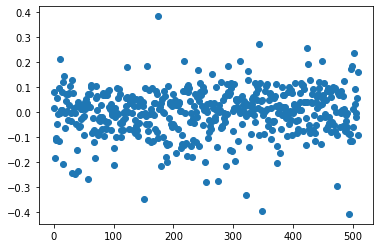

In [110]:
plt.scatter(np.arange(0,len(X_train_lm),1), y_train - y_train_cnt)
plt.show()

Making Predictions

In [111]:
num_vars=["temp","hum","windspeed","cnt"]
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])


In [112]:
y_test = df_test.pop('cnt')
X_test = df_test[Feat_selected]


In [113]:
# Adding a constant variable 
X_test = sm.add_constant(X_test)

In [114]:
# Making predictions
y_pred = lm.predict(X_test)

Text(0, 0.5, 'y_pred')

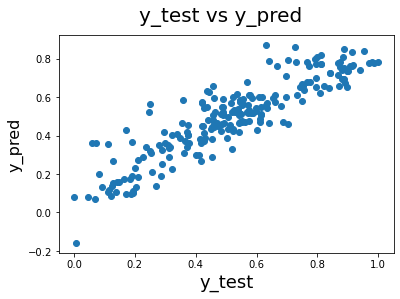

In [115]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)       

In [116]:
#evalute mode means compute r squred
R2=r2_score(y_true=y_test,y_pred=y_pred)
print(R2)

0.7873397515614863


In [117]:
##𝐴𝑑𝑗.𝑅2=1−(1−𝑅2)∗(𝑛−1)/(𝑛−𝑝−1)
Adjusted_R2=1-(1-R2)*(730-1)/(730-8-1)
print(Adjusted_R2)

0.7849801371544015


### Conclusion:

1. cnt(count of total rental bikes including both casual and registered)=0.395×temp+0.235×2019(Year)+0.052×Sep-0.151×windspeed -0.145×spring-0.072×July-0.274×Light_Snow-0.078×Mist

2. Top 3 features

<b> Temperature in Celsius </b>

<b> year(2019) </b>

<b> month(september)</b>

3. R-squared for test data set 0.787 and  0.824
